<a href="https://colab.research.google.com/github/DeepanshiDhir/Stock-Portfolios/blob/main/Final_Monte_Carlo_Simulation_of_Stock_Portfolios(MPT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project is about taking the previous data of certain asset classes, and creating a portfolio for different class of investers.Then use the method of monte carlo simulation to predict various future return scenerios for the same. This python notebook is for the same.

In this project, I am taking the investment horizan for 1 year (252) days only.

First, we will start by installing the required libraries in python.
The following are the required libraries

In [ ]:
pip install pandas numpy matplotlib datetime pandas_datareader yfinance

# **Importing Libararies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yfin
from scipy.stats import norm

**Function to get the previous asset class data**

In [ ]:
def get_data(asset_symbols,start,end):
    yfin.pdr_override()
    AssetData = pdr.get_data_yahoo(asset_symbols,start,end)
    AssetData= AssetData['Adj Close']
    return AssetData

# **Defining the Portfolio Asset Class**

Defining the portfolio elements and getting the previous data

In [ ]:
stocks = ['AMD','AMZN','KO','JPM','META','TSLA']
currency = ['EURUSD=X']
gold = ['GLD','SI=F']
endDate= dt.datetime.now()
startDate= endDate -dt.timedelta(days=1000)

stock_data =get_data(stocks,startDate,endDate)
currency_data=get_data(currency,startDate,endDate)
gold_data=get_data(gold,startDate,endDate)
display(stock_data)
display(currency_data)
display(gold_data)


stock_data =stock_data.pct_change().dropna()
currency_data=currency_data.pct_change().dropna()
gold_data=gold_data.pct_change().dropna()

total_items=len(stocks)+len(currency)+len(gold)

[*********************100%%**********************]  6 of 6 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


,AMD,AMZN,JPM,KO,META,TSLA
Date,,,,,,
2021-02-08,91.470001,166.147003,129.614883,45.928936,266.579987,287.806671
2021-02-09,90.910004,165.250000,129.096954,45.726536,269.450012,283.153320
2021-02-10,92.349998,164.328995,129.170975,45.634521,271.869995,268.273346
2021-02-11,92.660004,163.106506,128.810242,46.278561,270.390015,270.553345
2021-02-12,93.769997,163.885498,130.641541,46.637379,270.500000,272.040009
...,...,...,...,...,...,...
2023-10-27,96.430000,127.739998,135.690002,55.240002,296.730011,207.300003
2023-10-30,96.180000,132.710007,137.419998,56.150002,302.660004,197.360001
2023-10-31,98.500000,133.089996,139.059998,56.490002,301.269989,200.839996


Date
2021-02-08    1.204877
2021-02-09    1.205360
2021-02-10    1.211999
2021-02-11    1.212121
2021-02-12    1.213151
                ...   
2023-10-30    1.056245
2023-10-31    1.061504
2023-11-01    1.057910
2023-11-02    1.058705
2023-11-03    1.070893
Name: Adj Close, Length: 715, dtype: float64

,GLD,SI=F
Date,,
2021-02-08,171.520004,27.570000
2021-02-09,172.080002,27.396000
2021-02-10,172.710007,27.073999
2021-02-11,171.210007,27.042000
2021-02-12,170.690002,27.323000
...,...,...
2023-10-30,185.100006,23.282000
2023-10-31,184.089996,22.841000
2023-11-01,183.509995,22.684999


**Processing the data :**Will be using log returns as it follows the normal distribution.

In [ ]:
# Calculate log returns for all asset classes
log_returns_stocks = np.log(1+stock_data)
log_returns_currency = np.log(1+currency_data)
log_returns_gold = np.log(1+gold_data)
log_ret = pd.concat([log_returns_stocks, log_returns_currency, log_returns_gold], axis=1).dropna()

# Calculate the mean returns for the entire portfolio
meanReturns = log_ret.mean()

# Calculate the covariance matrix for the entire portfolio
covMatrix = log_ret.cov()

print(meanReturns)
print(covMatrix)

AMD          0.000239
AMZN        -0.000269
JPM          0.000127
KO           0.000316
META         0.000223
TSLA        -0.000400
Adj Close   -0.000168
GLD          0.000103
SI=F        -0.000279
dtype: float64
                AMD      AMZN       JPM        KO      META      TSLA  \
AMD        0.001063  0.000457  0.000161  0.000054  0.000506  0.000642   
AMZN       0.000457  0.000587  0.000122  0.000058  0.000441  0.000427   
JPM        0.000161  0.000122  0.000242  0.000057  0.000140  0.000157   
KO         0.000054  0.000058  0.000057  0.000106  0.000050  0.000039   
META       0.000506  0.000441  0.000140  0.000050  0.000974  0.000415   
TSLA       0.000642  0.000427  0.000157  0.000039  0.000415  0.001419   
Adj Close -0.000004  0.000008  0.000003 -0.000003 -0.000002 -0.000002   
GLD        0.000034  0.000025  0.000002  0.000012  0.000014  0.000009   
SI=F       0.000080  0.000062  0.000031  0.000025  0.000047  0.000056   

              Adj Close           GLD      SI=F  
AMD   

# **Defining the 3 types of portfolio classes**

We will set the maximum standard deviation/volatility for each type of portfolio class

**Method used to find optimal weights:** Each Portfolio profile is based on the maximum standard deviation a person can bare. So, monte carlo will be performed to find the 20000 weights for each class. Now the weights that give std less than the targeted std(set by user) and by maximum in the range will be considered as the optimal weights for that class.

In [ ]:
#define target standard deviation for the risk profiles
conservative_std= 0.2
moderate_std= .9
aggressive_std= 2.3

# **Creating the required Monte Carlo models**

**Monte Carlo to find the optimal weights of the portfolio**

For this part we will require the returns of the portfolio and the standard devation of the portfolio.

To calculate the expected returns, we use the following formula:

\begin{equation*}
\ R_p = (w_{1}r_{1}) + (w_{2}r_{2}) + \cdots + (w_{n}r_{n})
\end{equation*}

Where:

$
\begin{align}
\ r_{i} & = \text{Return of Security i} \\
\ w_{i} & = \text{Weight of Security i} \\
\end{align}
$

To calculate the standard deviation of the protfolio, we use the following formula:

\begin{equation*}
\ \sigma_p = \sqrt{(w_{i}^2 \sigma_i^2) + (w_{j}^2 \sigma_j^2) + (2w_{j}w_{i} p_{i,j} \sigma_i \sigma_j)}
\end{equation*}

Where:

$
\begin{align}
\ \sigma_{i} & = \text{Standard Deviation of Returns for Security i} \\
\ w_{i} & = \text{Weight of Security i} \\
\ p_{i,j} & = \text{Correlation Coefficent between the returns of asset i and asset j} \\
\end{align}
$

During the simulation we will store the weights of all the simulations and find the maximum standard deviation for the required portfolio class. Then we will use that data to calculate optimal weights for that portfolio class.

**Monte Carlo to simulate a given weighted portfolio**
This one is based on *Geometric Brownian Motion(GBM)* and uses Cholesky decomposition method.


GBM-


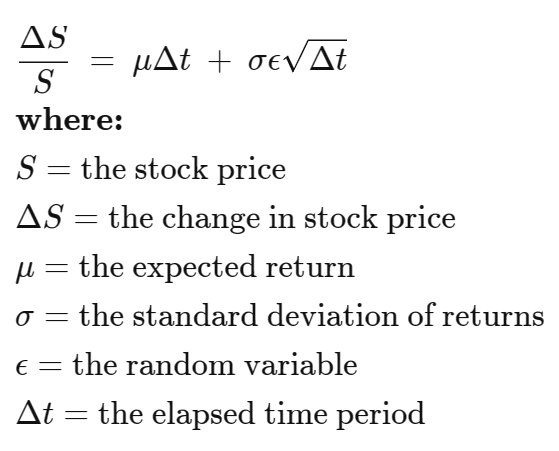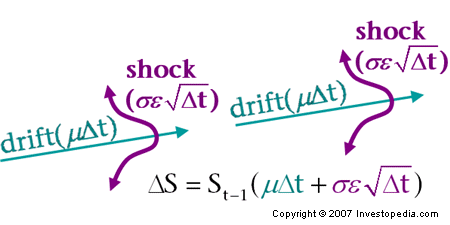

Cholesky decomposition method is used to predict the future stock prices based ont the historical data's mean and covariance
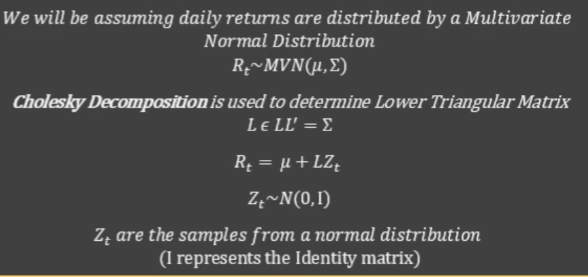

# Initial Portfolio Amount = $70000

In [ ]:
# number of simulations
mc_sims =10000
initial_portfolio=70000
T= 252 #timeframe in days
def monte_carlo_port(weights,num_sims):
    meanM =np.full(shape=(T,len(weights)),fill_value=meanReturns)
    meanM= meanM.T

    portfolio_sims =np.full(shape=(T,mc_sims),fill_value=0.0)

    for m in range(0,mc_sims):
      #do stuff
      #MC loops
      Z= np.random.normal(size=(T,len(weights)))
      L= np.linalg.cholesky(covMatrix)
      dailyReturns = meanM + np.inner(L,Z)
      portfolio_sims[:,m]= np.cumprod(np.inner(weights,dailyReturns.T)+1)*initial_portfolio

    return portfolio_sims

def weights_port_mc(log_ret,target_std):
    num_ports=20000
    all_weights=np.zeros((num_ports,total_items))
    ret_arr=np.zeros(num_ports)

    for ind in range(num_ports):
      weight=np.array(np.random.random(total_items))

      weight=weight/np.sum(weight)

      all_weights[ind,:]=weight
      port_std =np.sqrt(np.dot(weight.T,np.dot(log_ret.cov()*252,weight)))

    #expected returns
      if port_std<=target_std:
      #caluculate expected
        ret_arr[ind]=np.sum((log_ret.mean()*weight)*252)

    max_sr_index=ret_arr.argmax()
    optimal_weights=all_weights[max_sr_index,:]
    return optimal_weights

Finding the optimal weights of each portfolio and asset

In [ ]:
conservative_weights =weights_port_mc(log_ret,conservative_std)
aggresive_weights =weights_port_mc(log_ret,aggressive_std)
moderate_weights =weights_port_mc(log_ret,moderate_std)
print("The optimal weights of aggresive portfolio ")
print(aggresive_weights)
print("The optimal weights of conservative portfolio ")
print(conservative_weights)
print("The optimal weights of moderate portfolio ")
print(moderate_weights)


The optimal weights of aggresive portfolio 
[0.30666524 0.01381703 0.01021136 0.28640233 0.27312974 0.04311272
 0.04974817 0.00751966 0.00939377]
The optimal weights of conservative portfolio 
[0.03954787 0.00455692 0.07067158 0.18901239 0.02789591 0.0433708
 0.31793317 0.27860535 0.02840601]
The optimal weights of moderate portfolio 
[0.06709784 0.00529948 0.2219388  0.21646768 0.35327605 0.00042329
 0.00680926 0.12145966 0.00722792]


Running and storing the monte carlo simuations for the 3 portfolio

In [ ]:
conservative_sims=monte_carlo_port(conservative_weights,mc_sims)
aggressive_sims=monte_carlo_port(aggresive_weights,mc_sims)
moderate_sims=monte_carlo_port(moderate_weights,mc_sims)

# **Analysis Of the Simulated portfolios**

1.This part shows the simulated portfolios on the graph

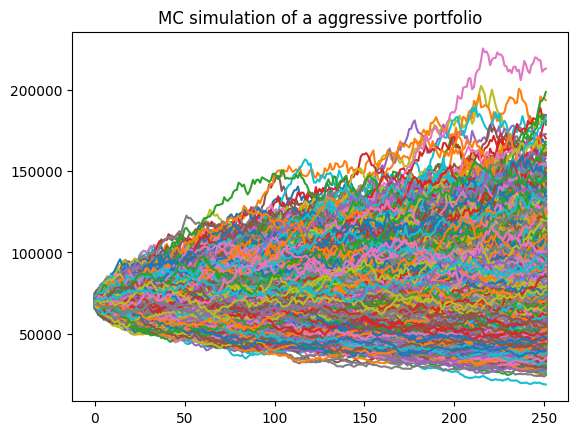

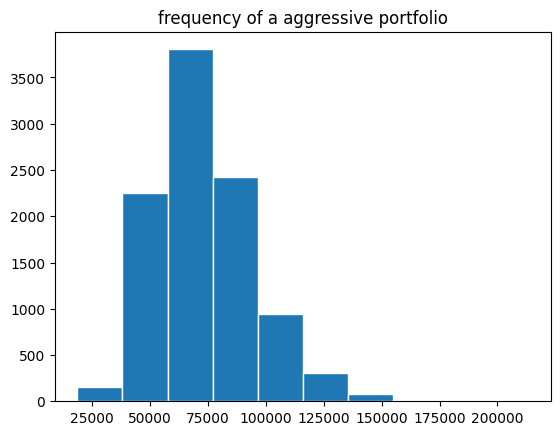

In [ ]:
plt.plot(aggressive_sims)
plt.ylabel=('portfolio Value ($)')
plt.xlabel=('days')
plt.title('MC simulation of a aggressive portfolio')
plt.show()

aggressive_end_price=aggressive_sims[-1][:]
# plot:
fig, ax = plt.subplots()

ax.hist(aggressive_end_price,edgecolor="white")
plt.title('frequency of a aggressive portfolio')
plt.xlabel='Portfolio final Price'
plt.ylabel='frequency'
plt.show()
aggressive_returns=(aggressive_end_price - initial_portfolio)/initial_portfolio*100


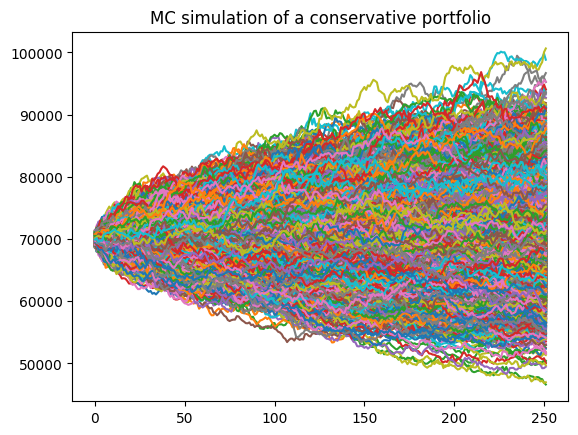

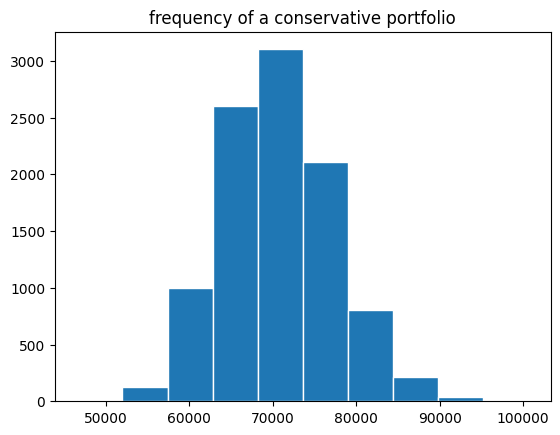

In [ ]:
plt.plot(conservative_sims)
plt.ylabel=('portfolio Value ($)')
plt.xlabel=('days')
plt.title('MC simulation of a conservative portfolio')
plt.show()

conservative_end_price=conservative_sims[-1][:]
# plot:
fig, ax = plt.subplots()

ax.hist(conservative_end_price,edgecolor="white")
plt.title('frequency of a conservative portfolio')
plt.xlabel='Portfolio final Price'
plt.ylabel='frequency'
plt.show()
conservative_returns=(conservative_end_price - initial_portfolio)/initial_portfolio*100

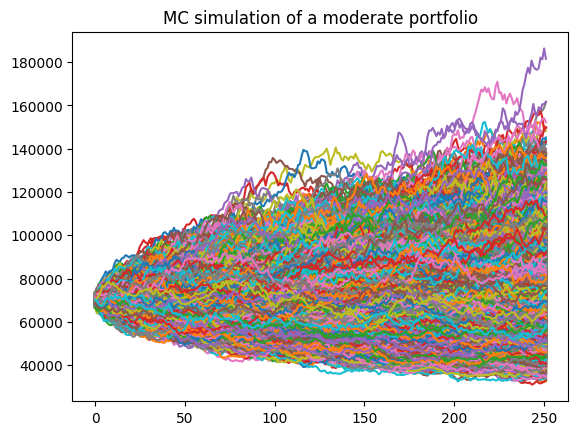

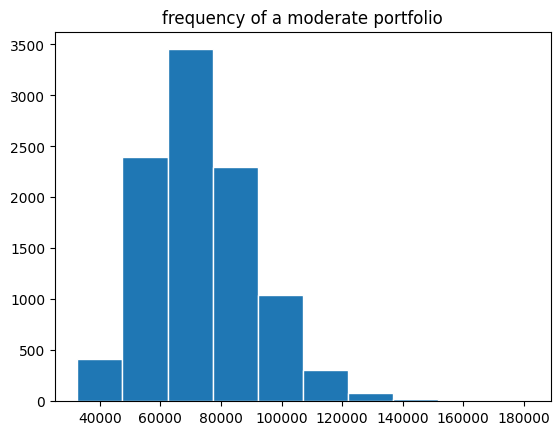

In [ ]:
plt.plot(moderate_sims)
plt.ylabel=('portfolio Value ($)')
plt.xlabel=('days')
plt.title('MC simulation of a moderate portfolio')
plt.show()

moderate_end_price=moderate_sims[-1][:]
# plot:
fig, ax = plt.subplots()

ax.hist(moderate_end_price,edgecolor="white")
plt.xlabel=('Portfolio final Price')
plt.title('frequency of a moderate portfolio')
plt.ylabel=('frequency')
plt.show()
moderate_returns=(moderate_end_price - initial_portfolio)/initial_portfolio*100

2. This part will show a box plot of the returns of 3 portfolios

first for aggressive ,second conservative and third for moderate

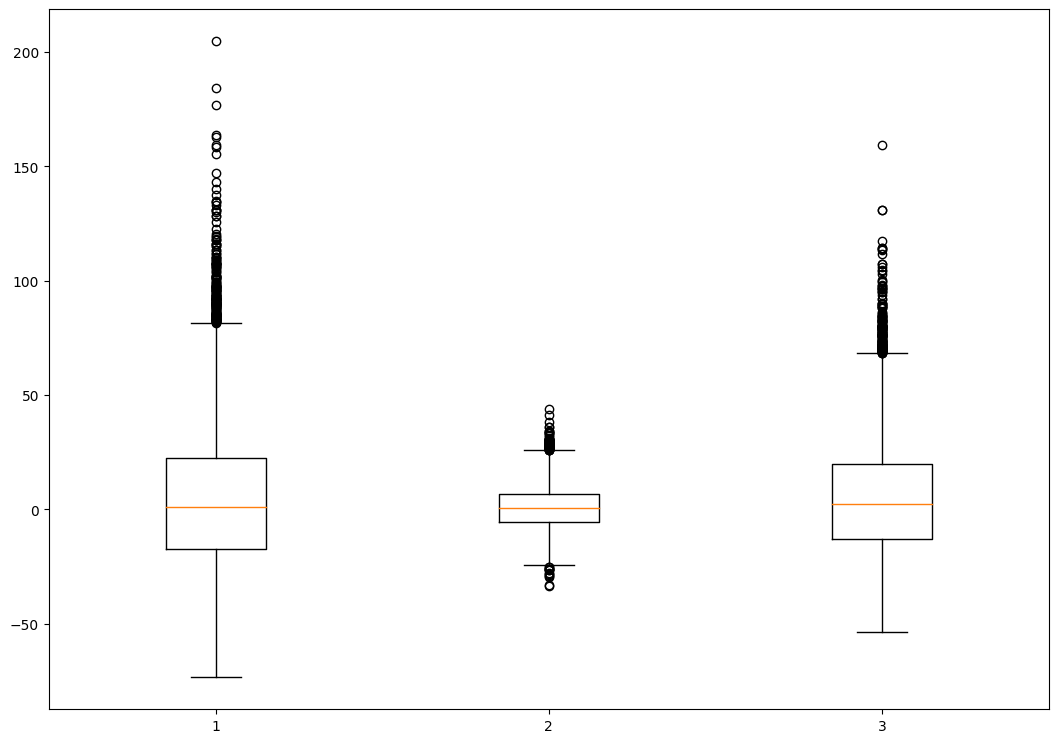

In [ ]:
fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot([aggressive_returns,conservative_returns,moderate_returns])

# show plot
plt.show()

3. ***Drawdown***- A drawdown is a peak-to-trough decline during a specific period for an investment, trading account, or fund. A drawdown measures the historical risk of different investments, compares fund performance, or monitors personal trading performance.

  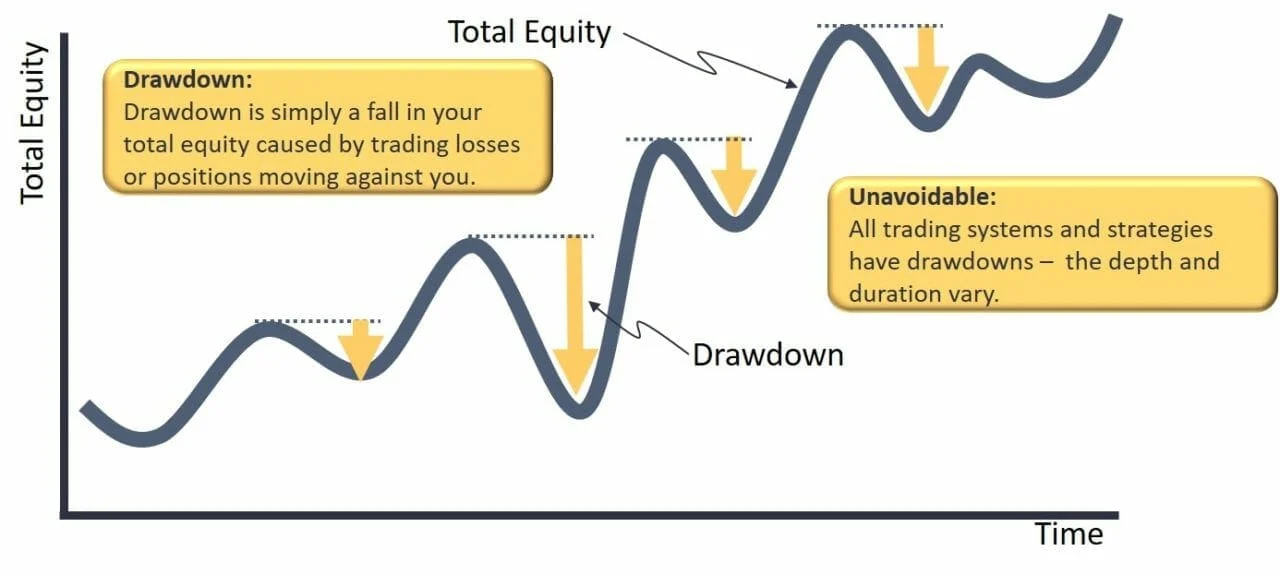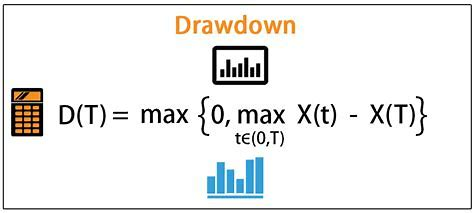

  Since this is a simulation of 10000 portfolio for each asset class, so we will give the mean drawdown

In [ ]:
#acc_max = np.maximum.accumulate(aggressive_path_mean)
#print((aggressive_path_mean - acc_max).min())

max_d=[]
for i in range(0, 10000):
  acc_max = np.maximum.accumulate(aggressive_sims[:, i])
  max_d.append((aggressive_sims[:,i] - acc_max).min())
print("Aggressive Drawdown:")
print(sum(max_d)/len(max_d))

max_d=[]
for i in range(0, 10000):
  acc_max = np.maximum.accumulate(moderate_sims[:, i])
  max_d.append((moderate_sims[:,i] - acc_max).min())
print("Moderate Drawdown:")
print(sum(max_d)/len(max_d))

max_d=[]
for i in range(0, 10000):
  acc_max = np.maximum.accumulate(conservative_sims[:, i])
  max_d.append((conservative_sims[:,i] - acc_max).min())
print("conservative Drawdown:")
print(sum(max_d)/len(max_d))


Aggressive Drawdown:
-23018.71146729009
Moderate Drawdown:
-18479.3222771157
conservative Drawdown:
-7508.384089495371


4. Mean Path - Calculating the mean value of each day of a simulation
5. Volatility - Calculating the daily volatility of each simulation by calculating daily returns and also calculating the volatility of the price each day

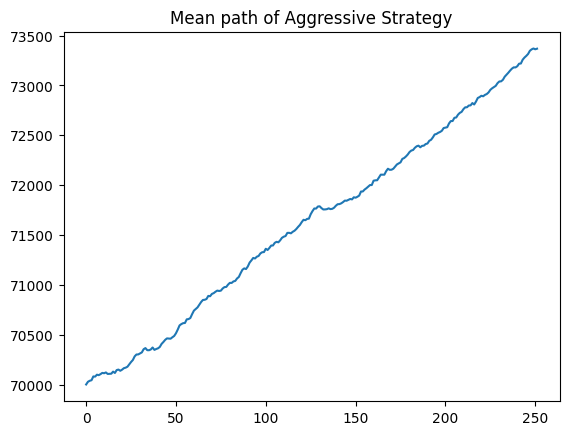

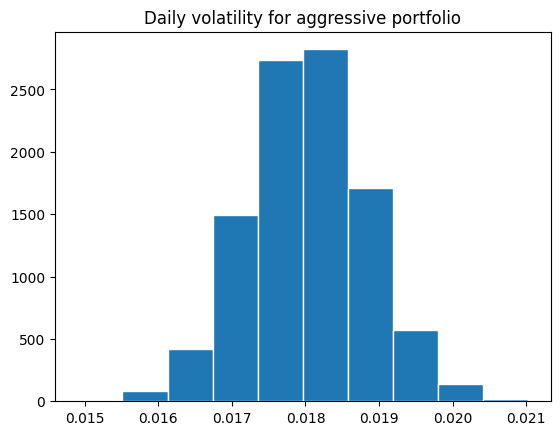

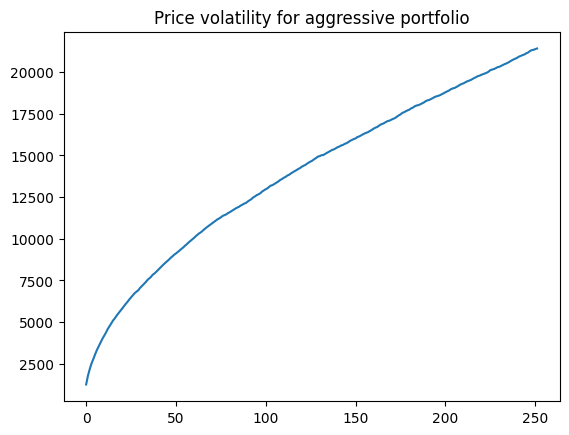

In [ ]:
aggressive_path_mean=np.zeros(252)
for i in range(0,252):
    aggressive_path_mean[i]=aggressive_sims[i].mean()
plt.title('Mean path of Aggressive Strategy')
plt.plot(aggressive_path_mean)
plt.show()
aggressive_daily_volatility=np.zeros(10000)
for i in range(0,10000):
  one_port=aggressive_sims[:,i]
  df=pd.DataFrame(one_port).pct_change()
  aggressive_daily_volatility[i]=df.std()
# plot:
fig, ax = plt.subplots()

ax.hist(aggressive_daily_volatility,edgecolor="white")
plt.title('Daily volatility for aggressive portfolio')
plt.xlabel=('Portfolio final Price')
plt.ylabel=('frequency')
plt.show()

aggressive_price_volatility=np.zeros(252)
for i in range(0,252):
    aggressive_price_volatility[i]=aggressive_sims[i].std()

plt.plot(aggressive_price_volatility)
plt.title('Price volatility for aggressive portfolio')
plt.show()



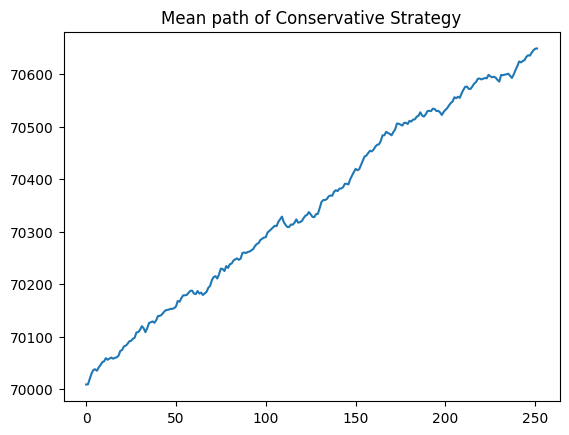

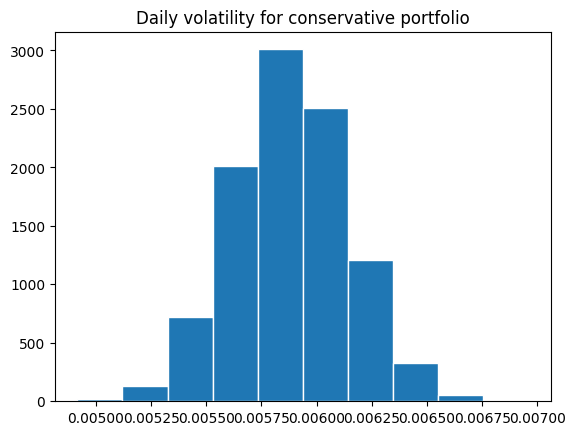

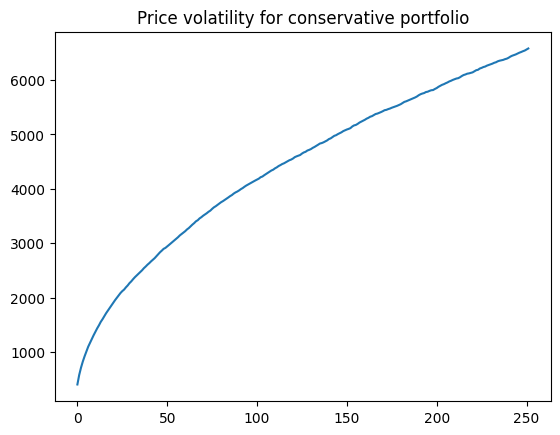

In [ ]:
conservative_path_mean=np.zeros(252)
for i in range(0,252):
    conservative_path_mean[i]=conservative_sims[i].mean()
plt.title('Mean path of Conservative Strategy')
plt.plot(conservative_path_mean)
plt.show()
conservative_daily_volatility=np.zeros(10000)
for i in range(0,10000):
  one_port=conservative_sims[:,i]
  df=pd.DataFrame(one_port).pct_change()
  conservative_daily_volatility[i]=df.std()
# plot:
fig, ax = plt.subplots()

ax.hist(conservative_daily_volatility,edgecolor="white")
plt.title('Daily volatility for conservative portfolio')
plt.xlabel=('Portfolio final Price')
plt.ylabel=('frequency')
plt.show()

conservative_price_volatility=np.zeros(252)
for i in range(0,252):
    conservative_price_volatility[i]=conservative_sims[i].std()

plt.plot(conservative_price_volatility)
plt.title('Price volatility for conservative portfolio')
plt.show()


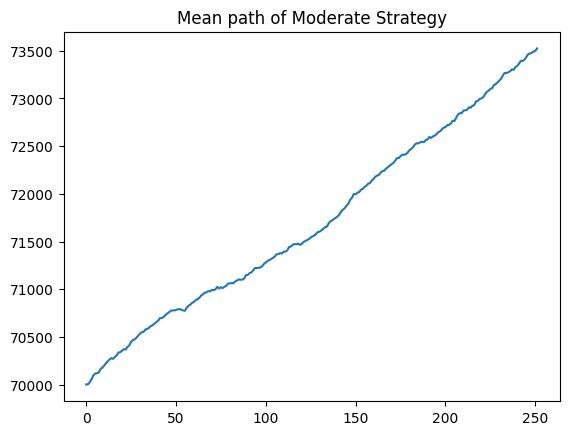

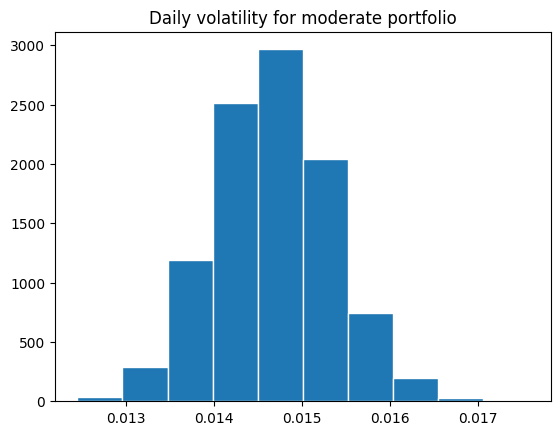

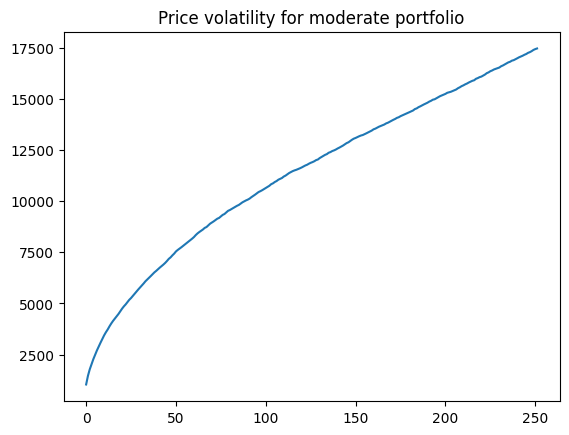

In [ ]:
moderate_path_mean=np.zeros(252)
for i in range(0,252):
    moderate_path_mean[i]=moderate_sims[i].mean()
plt.title('Mean path of Moderate Strategy')
plt.plot(moderate_path_mean)
plt.show()
moderate_daily_volatility=np.zeros(10000)
for i in range(0,10000):
  one_port=moderate_sims[:,i]
  df=pd.DataFrame(one_port).pct_change()
  moderate_daily_volatility[i]=df.std()
# plot:
fig, ax = plt.subplots()

ax.hist(moderate_daily_volatility,edgecolor="white")
plt.title('Daily volatility for moderate portfolio')
plt.xlabel=('Portfolio final Price')
plt.ylabel=('frequency')
plt.show()

moderate_price_volatility=np.zeros(252)
for i in range(0,252):
    moderate_price_volatility[i]=moderate_sims[i].std()

plt.plot(moderate_price_volatility)
plt.title('Price volatility for moderate portfolio')
plt.show()


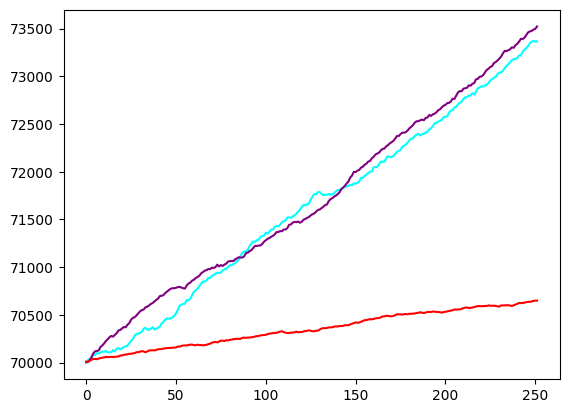

In [ ]:
#combining the 3 mean paths together
plt.plot(aggressive_path_mean,color='cyan')
plt.plot(moderate_path_mean,color='purple')
plt.plot(conservative_path_mean,color='red')
plt.show()

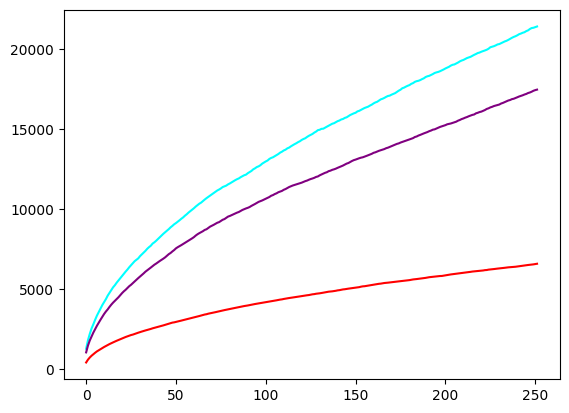

In [ ]:
#conbining the 3 price standard deviations
plt.plot(aggressive_price_volatility,color='cyan')
plt.plot(moderate_price_volatility,color='purple')
plt.plot(conservative_price_volatility,color='red')
plt.show()

In [ ]:
#printing the maximum ,minimum and average returns of each portfolio
print('The maximum returns of aggressive:')
print(aggressive_returns.max())
print('The average returns of aggressive:')
print(aggressive_returns.mean())
print('The minimum returns of aggressive:')
print(aggressive_returns.min())
print('The maximum returns of conservative:')
print(conservative_returns.max())
print('The average returns of conservative:')
print(conservative_returns.mean())
print('The minimum returns of conservative:')
print(conservative_returns.min())
print('The maximum returns of moderate:')
print(moderate_returns.max())
print('The average returns of moderate:')
print(moderate_returns.mean())
print('The minimum returns of moderate:')
print(moderate_returns.min())

The maximum returns of aggressive:
204.75519235625103
The average returns of aggressive:
4.812289847876883
The minimum returns of aggressive:
-73.43634242029302
The maximum returns of conservative:
43.76084748113979
The average returns of conservative:
0.9274387097460655
The minimum returns of conservative:
-33.42094313466723
The maximum returns of moderate:
159.28512220664211
The average returns of moderate:
5.03192655165968
The minimum returns of moderate:
-53.45986145031163


By Positive returns, I mean to find the no.of possible times the portfolio gives a positive return.

In [ ]:
#Chances of positive returns in 3 portfolios
a_r=0
c_r=0
m_r=0
for i in range(0,10000):
  if aggressive_returns[i]>0:
    a_r+=1
  if conservative_returns[i]>0:
    c_r+=1
  if moderate_returns[i]>0:
    m_r+=1

print('Aggressive +ve returns chances')
print(a_r/mc_sims*100)
print('Moderate +ve returns chances')
print(m_r/mc_sims*100)
print('conservative +ve returns chances')
print(c_r/mc_sims*100)

Aggressive +ve returns chances
50.980000000000004
Moderate +ve returns chances
53.54
conservative +ve returns chances
51.92


6.Var (Portfolio value at risk)- Value at risk (VaR) is a statistic that quantifies the extent of possible financial losses within a firm, portfolio, or position over a specific time frame. This metric is most commonly used by investment and commercial banks to determine the extent and probabilities of potential losses in their institutional portfolios

Here we set a confidence level of 95 percentage that loss will not exceed a certain threshold.

The z-score is used to assess the significance of deviations or losses relative to the estimated VaR. The z-score helps you understand how many standard deviations away from the VaR estimate an actual loss falls.

Interpreting the z-score:

-A positive z-score suggests that the actual loss was worse (greater) than expected, indicating a shortfall in risk management. This could be a sign that the portfolio or investment is riskier than initially estimated.

-A negative z-score suggests that the actual loss was less than expected, indicating a better-than-expected outcome. However, it's essential to remember that losses can still occur, even if they are less severe than the VaR estimate.

In the context of a portfolio, "var" stands for Value at Risk. Value at Risk is a statistical measure used to assess the potential loss in the value of a portfolio of investments or assets over a certain time frame at a specified confidence level. It provides investors and financial institutions with an estimate of how much they could potentially lose on their investments under adverse market conditions.


Parametric VaR:
This method uses statistical models to estimate VaR. The most common approach is to assume that portfolio returns follow a normal distribution. To calculate parametric VaR, follow these steps:

a. Determine the time horizon and confidence level as in the historical VaR method.
b. Calculate the mean (expected return) and standard deviation (volatility) of your portfolio returns over the historical data.
c. Find the critical value (z-score) corresponding to your chosen confidence level. You can look up z-scores in a standard normal distribution table or use a calculator.
d. Calculate the VaR using the formula:

VaR = Portfolio Value x [Mean Return - (Z-Score x Standard Deviation)]

we are using the above value and formula to calculate the var value for  agiven historical data

so var gives me the idea that my losses will always be less than or equal to var value(%) under a 95% confidence interval

In [ ]:

# Calculate daily returns from the price data
#returns = data.pct_change().dropna()

# Calculate the mean and covariance matrix of returns

# Define the confidence level and investment horizon
confidence_level = 0.95 # Change to your desired confidence level
investment_horizon = 252  # Number of days for the VaR estimate

weights = aggresive_weights
# Calculate the portfolio returns and standard deviation
portfolio_return = np.sum(weights * meanReturns)
portfolio_stddev = np.sqrt(np.dot(weights, np.dot(covMatrix, weights)))

# Calculate the z-score for the specified confidence level
z_score = norm.ppf(confidence_level)
print(z_score)

# Calculate the portfolio VaR
portfolio_var = portfolio_return - z_score * portfolio_stddev * np.sqrt(investment_horizon)

print(f"Portfolio Value at Risk (VaR) at {confidence_level * 100}% confidence over {investment_horizon} day(s) for aggressive portfolio is: {portfolio_var:.2f}%")

weights= moderate_weights
portfolio_return = np.sum(weights * meanReturns)
portfolio_stddev = np.sqrt(np.dot(weights, np.dot(covMatrix, weights)))
z_score = norm.ppf(confidence_level)
portfolio_var = portfolio_return - z_score * portfolio_stddev * np.sqrt(investment_horizon)
print(f"Portfolio Value at Risk (VaR) at {confidence_level * 100}% confidence over {investment_horizon} day(s) for moderate portfolio is: {portfolio_var:.2f}%")

weights= conservative_weights
portfolio_return = np.sum(weights * meanReturns)
portfolio_stddev = np.sqrt(np.dot(weights, np.dot(covMatrix, weights)))
z_score = norm.ppf(confidence_level)
portfolio_var = portfolio_return - z_score * portfolio_stddev * np.sqrt(investment_horizon)
print(f"Portfolio Value at Risk (VaR) at {confidence_level * 100}% confidence over {investment_horizon} day(s) for conservative portfolio is: {portfolio_var:.2f}%")


1.6448536269514722
Portfolio Value at Risk (VaR) at 95.0% confidence over 252 day(s) for aggressive portfolio is: -0.47%
Portfolio Value at Risk (VaR) at 95.0% confidence over 252 day(s) for moderate portfolio is: -0.38%
Portfolio Value at Risk (VaR) at 95.0% confidence over 252 day(s) for conservative portfolio is: -0.15%


The above part is shows the percentage var and actual value will be this percentage times initial portfolio value